<a href="https://colab.research.google.com/github/Niharika9948/NLP/blob/main/Assignment_5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import re
import spacy
import nltk
import matplotlib.pyplot as plt

from collections import Counter
from spacy.language import Language
from spacy.tokens import Doc

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [19]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
df = pd.read_csv("/content/Tweets.csv")

# Extract only required columns
df = df[['airline_sentiment', 'text']]
df.head()


,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


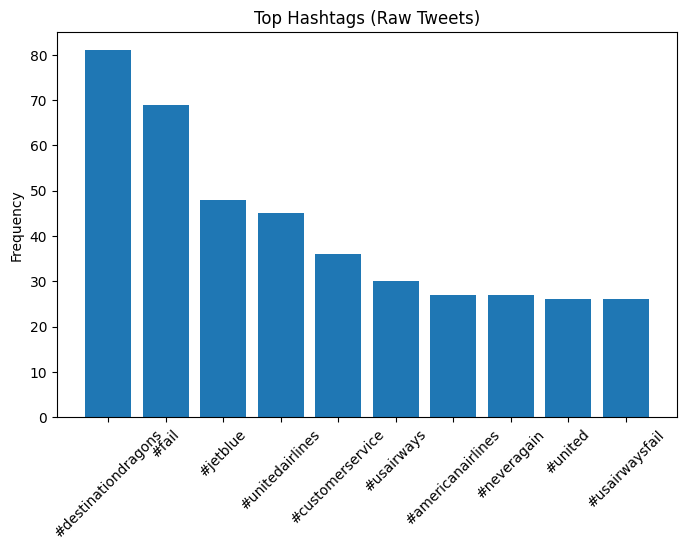

In [21]:
hashtags = []

for tweet in df['text']:
    hashtags.extend(re.findall(r"#\w+", tweet.lower()))

hashtag_freq_raw = Counter(hashtags).most_common(10)

labels, values = zip(*hashtag_freq_raw)

plt.figure(figsize=(8,5))
plt.bar(labels, values)
plt.title("Top Hashtags (Raw Tweets)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()


In [22]:
def clean_tweet(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)   # remove URLs
    text = re.sub(r"@\w+", "", text)             # remove mentions
    text = re.sub(r"[^a-z0-9#\s]", "", text)     # remove emojis/special chars
    text = re.sub(r"\s+", " ", text).strip()
    return text


In [23]:
df['clean_text'] = df['text'].apply(clean_tweet)
df.head()


,airline_sentiment,text,clean_text
0,neutral,@VirginAmerica What @dhepburn said.,what said
1,positive,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experience...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,i didnt today must mean i need to take another...
3,negative,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious enter...
4,negative,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it


In [25]:
nltk.download('punkt_tab')
df['tokens'] = df['clean_text'].apply(word_tokenize)
df.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,airline_sentiment,text,clean_text,tokens
0,neutral,@VirginAmerica What @dhepburn said.,what said,"[what, said]"
1,positive,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experience...,"[plus, youve, added, commercials, to, the, exp..."
2,neutral,@VirginAmerica I didn't today... Must mean I n...,i didnt today must mean i need to take another...,"[i, didnt, today, must, mean, i, need, to, tak..."
3,negative,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious enter...,"[its, really, aggressive, to, blast, obnoxious..."
4,negative,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it,"[and, its, a, really, big, bad, thing, about, it]"


In [26]:
stop_words = set(stopwords.words('english'))

df['tokens_nostop'] = df['tokens'].apply(
    lambda tokens: [word for word in tokens if word not in stop_words]
)

df.head()


,airline_sentiment,text,clean_text,tokens,tokens_nostop
0,neutral,@VirginAmerica What @dhepburn said.,what said,"[what, said]",[said]
1,positive,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experience...,"[plus, youve, added, commercials, to, the, exp...","[plus, youve, added, commercials, experience, ..."
2,neutral,@VirginAmerica I didn't today... Must mean I n...,i didnt today must mean i need to take another...,"[i, didnt, today, must, mean, i, need, to, tak...","[didnt, today, must, mean, need, take, another..."
3,negative,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious enter...,"[its, really, aggressive, to, blast, obnoxious...","[really, aggressive, blast, obnoxious, enterta..."
4,negative,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it,"[and, its, a, really, big, bad, thing, about, it]","[really, big, bad, thing]"


In [27]:
nlp = spacy.load("en_core_web_sm")


In [29]:
Doc.set_extension("hashtags", default=[], force=True)

@Language.component("hashtag_extractor")
def hashtag_extractor(doc):
    doc._.hashtags = [token.text for token in doc if token.text.startswith("#")]
    return doc

nlp.add_pipe("hashtag_extractor", last=True)
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'hashtag_extractor']

In [30]:
processed_docs = []

for tokens in df['tokens_nostop']:
    text = " ".join(tokens)
    processed_docs.append(nlp(text))


In [31]:
df['lemmas'] = [
    [token.lemma_ for token in doc if token.pos_ != "PUNCT"]
    for doc in processed_docs
]

df['pos_tags'] = [
    [token.pos_ for token in doc]
    for doc in processed_docs
]

df.head()


,airline_sentiment,text,clean_text,tokens,tokens_nostop,lemmas,pos_tags
0,neutral,@VirginAmerica What @dhepburn said.,what said,"[what, said]",[said],[say],[VERB]
1,positive,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experience...,"[plus, youve, added, commercials, to, the, exp...","[plus, youve, added, commercials, experience, ...","[plus, you, ve, add, commercial, experience, t...","[CCONJ, PRON, AUX, VERB, NOUN, NOUN, ADV]"
2,neutral,@VirginAmerica I didn't today... Must mean I n...,i didnt today must mean i need to take another...,"[i, didnt, today, must, mean, i, need, to, tak...","[didnt, today, must, mean, need, take, another...","[do, not, today, must, mean, need, take, anoth...","[AUX, PART, NOUN, AUX, VERB, AUX, VERB, DET, N..."
3,negative,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious enter...,"[its, really, aggressive, to, blast, obnoxious...","[really, aggressive, blast, obnoxious, enterta...","[really, aggressive, blast, obnoxious, enterta...","[ADV, ADJ, NOUN, ADJ, NOUN, NOUN, VERB, ADJ, A..."
4,negative,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it,"[and, its, a, really, big, bad, thing, about, it]","[really, big, bad, thing]","[really, big, bad, thing]","[ADV, ADJ, ADJ, NOUN]"


In [32]:
df['processed_tweet'] = df['lemmas'].apply(lambda x: " ".join(x))

final_df = df[['airline_sentiment', 'processed_tweet']]
final_df.head()


,airline_sentiment,processed_tweet
0,neutral,say
1,positive,plus you ve add commercial experience tacky
2,neutral,do not today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainmen...
4,negative,really big bad thing


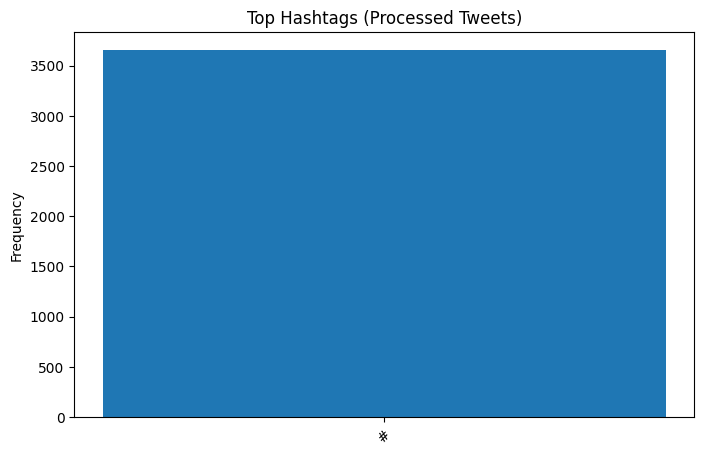

In [33]:
all_hashtags = []

for doc in processed_docs:
    all_hashtags.extend(doc._.hashtags)

hashtag_freq = Counter(all_hashtags).most_common(10)

labels, values = zip(*hashtag_freq)

plt.figure(figsize=(8,5))
plt.bar(labels, values)
plt.title("Top Hashtags (Processed Tweets)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()


In [34]:
negative_docs = [
    doc for doc, sentiment in zip(processed_docs, df['airline_sentiment'])
    if sentiment == 'negative'
]

neg_pos = []

for doc in negative_docs:
    neg_pos.extend([token.pos_ for token in doc])

pos_freq = Counter(neg_pos)


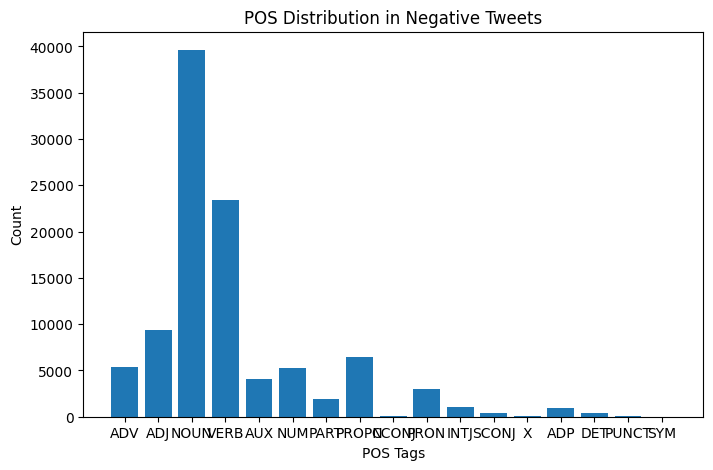

In [35]:
plt.figure(figsize=(8,5))
plt.bar(pos_freq.keys(), pos_freq.values())
plt.title("POS Distribution in Negative Tweets")
plt.xlabel("POS Tags")
plt.ylabel("Count")
plt.show()
